In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
spotify_data = pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv", encoding='latin1')

In [3]:
spotify_data.shape

(953, 24)

In [4]:
spotify_data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Dataset column Description
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

In [5]:
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
spotify_data['artist(s)_name'].unique

<bound method Series.unique of 0        Latto, Jung Kook
1             Myke Towers
2          Olivia Rodrigo
3            Taylor Swift
4               Bad Bunny
              ...        
948          Selena Gomez
949          Taylor Swift
950    Feid, Paulo Londra
951    Feid, Sech, Jhayco
952             Burna Boy
Name: artist(s)_name, Length: 953, dtype: object>

In [7]:
'Taylor Swift' in spotify_data['artist(s)_name'].values

True

In [8]:
pattern = 'taylor swift'
spotify_data[spotify_data['artist(s)_name'].str.contains(pattern, case=False)]['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                  34
Taylor Swift, Ice Spice        1
Lana Del Rey, Taylor Swift     1
Taylor Swift, Lana Del Rey     1
Ed Sheeran, Taylor Swift       1
Name: count, dtype: int64

We are only interested in Taylor Swift Data

In [9]:
taylorswift_data = spotify_data[spotify_data['artist(s)_name']=='Taylor Swift'].copy()
taylorswift_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,123,F#,Major,69,82,76,6,0,6,3
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,97,E,Major,64,51,63,12,0,19,5
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,...,96,F,Major,75,57,68,9,0,13,6
38,Style,Taylor Swift,1,2014,1,1,7830,42,786181836,94,...,95,D,Major,60,48,79,0,0,12,4


since the only artist in the dataset is Taylor Swift and the she's the only one who sang these songs

In [10]:
taylorswift_data['mode'].value_counts()

mode
Major    30
Minor     4
Name: count, dtype: int64

The major mode typically has a brighter, happier sound, while the minor mode often conveys a more somber or melancholic tone.

Lets remove
- artist(s)_name
- artist_count
- mode

In [11]:
taylorswift_data.drop(['artist(s)_name','artist_count','mode'], axis=1, inplace=True)


In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (4.5, 3.5)

Lets do a Univariate analysis on TaylorSwift songs

In [13]:
taylorswift_data[['danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%']].describe()

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,59.764706,35.558824,56.794118,27.882353,0.676471,15.411765,7.382353
std,11.026301,22.799776,18.474847,28.070004,3.771669,9.474424,6.862347
min,34.000000,4.000000,16.000000,0.000000,0.000000,6.000000,3.000000
25%,50.250000,16.500000,44.750000,6.000000,0.000000,9.250000,4.000000
50%,63.000000,39.000000,57.000000,16.000000,0.000000,12.000000,5.000000
75%,66.750000,50.750000,72.750000,48.250000,0.000000,16.000000,7.750000
max,80.000000,95.000000,89.000000,97.000000,22.000000,48.000000,39.000000


There's a diverse range in the emotional spectrum, evident from moderate danceability (mean: ~59.76%) and varying valence (mean: ~35.56%), implying a mix of lively and emotionally diverse tracks. The energy levels are relatively moderate (mean: ~56.79%), suggesting a balanced tempo across her compositions. Notably, there's a prevalence of non-instrumental tracks (mean: ~0.68%), indicating a focus on lyrical and melodic elements. Overall, her music seems dynamically engaging with a noticeable blend of emotional tones and moderate energy.







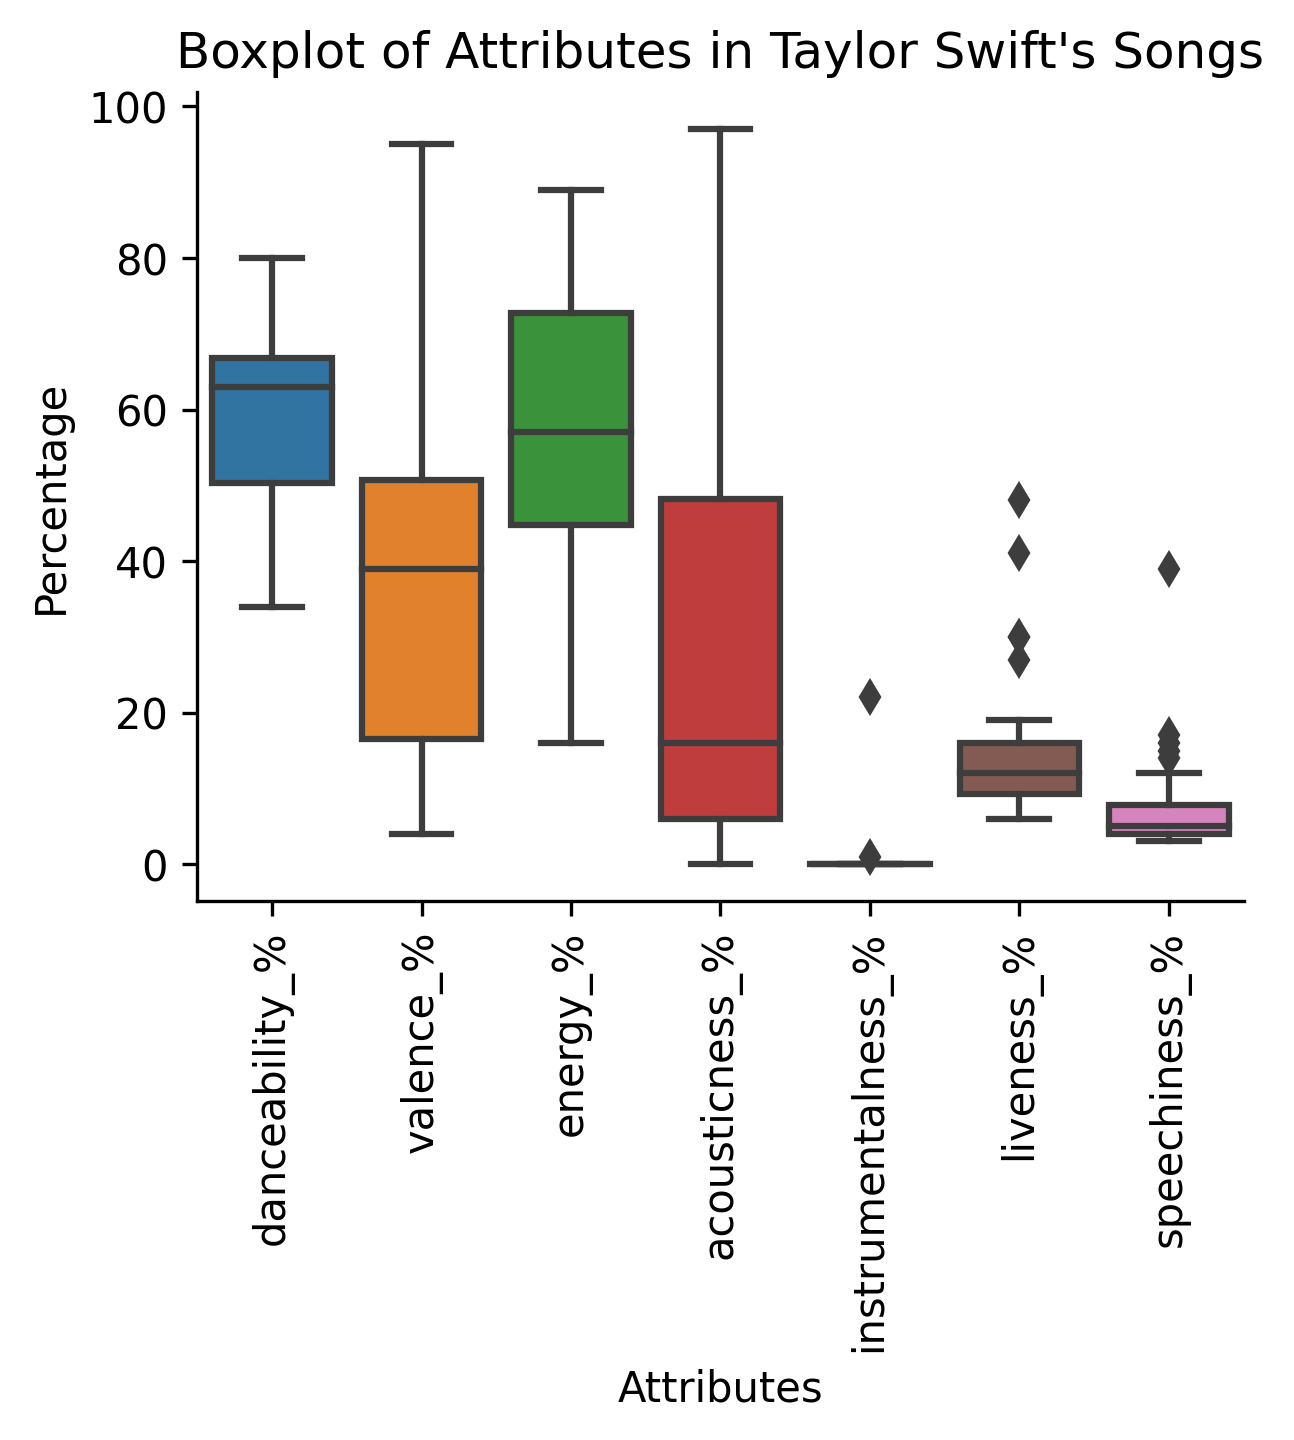

In [14]:

sns.boxplot(data=taylorswift_data[['danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%']])
plt.title("Boxplot of Attributes in Taylor Swift's Songs")
plt.ylabel("Percentage")
plt.xlabel("Attributes")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Lets analyze taylor swift chart and playlist performance

In [15]:
taylorswift_data[['in_spotify_playlists', 'in_spotify_charts',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts']].describe()

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,3911.000000,15.941176,52.823529,54.882353,1.705882
std,4309.570224,21.567289,72.932293,51.250286,3.280146
min,86.000000,0.000000,1.000000,0.000000,0.000000
25%,1334.500000,0.000000,10.500000,6.750000,0.000000
50%,2420.500000,9.500000,24.500000,44.000000,0.000000
75%,4815.000000,23.000000,50.750000,92.250000,1.750000
max,21335.000000,100.000000,328.000000,207.000000,12.000000


- In-Spotify Playlists: Taylor Swift's songs, on average, appear in approximately 3911 playlists, with a wide range from a minimum of 86 to a maximum of 21335.
- In-Spotify Charts: Typically, her songs secure an average position of approximately 16 in Spotify's chart, varying from absent (minimum of 0) to a high of 100.
- In-Apple Playlists: Her tracks average around 53 placements in Apple Music playlists, ranging from a minimum of 1 to a maximum of 328.
- In-Apple Charts and Deezer Charts: Taylor Swift's songs generally hold a slightly higher average position in Apple Music charts (approximately 55) compared to Deezer charts (approximately 2), with considerable variability in their rankings.

# Breakdown of Taylor Swift's Musical Elements 


In [16]:
taylorswift_data['bpm'].value_counts()

bpm
96     3
97     2
130    2
90     2
164    2
170    1
120    1
158    1
177    1
110    1
126    1
109    1
80     1
144    1
93     1
108    1
146    1
140    1
106    1
123    1
160    1
121    1
206    1
136    1
142    1
82     1
95     1
166    1
Name: count, dtype: int64

In [17]:
# Create bins for the 'bpm' column
bins = pd.cut(taylorswift_data['bpm'], bins=6, labels=['Very Slow', 'Slow', 'Moderate', 'Fast', 'Very Fast', 'Extremely Fast'])

# Add the bins as a new column to the DataFrame
taylorswift_data['bpm_category'] = bins
taylorswift_data['bpm_category'].value_counts(), taylorswift_data['key'].value_counts()

(bpm_category
 Very Slow         11
 Moderate           7
 Slow               6
 Fast               6
 Very Fast          3
 Extremely Fast     1
 Name: count, dtype: int64,
 key
 G     7
 E     4
 F     4
 D     4
 F#    3
 G#    3
 A     2
 B     1
 A#    1
 Name: count, dtype: int64)

Lets do Bivariate analysis

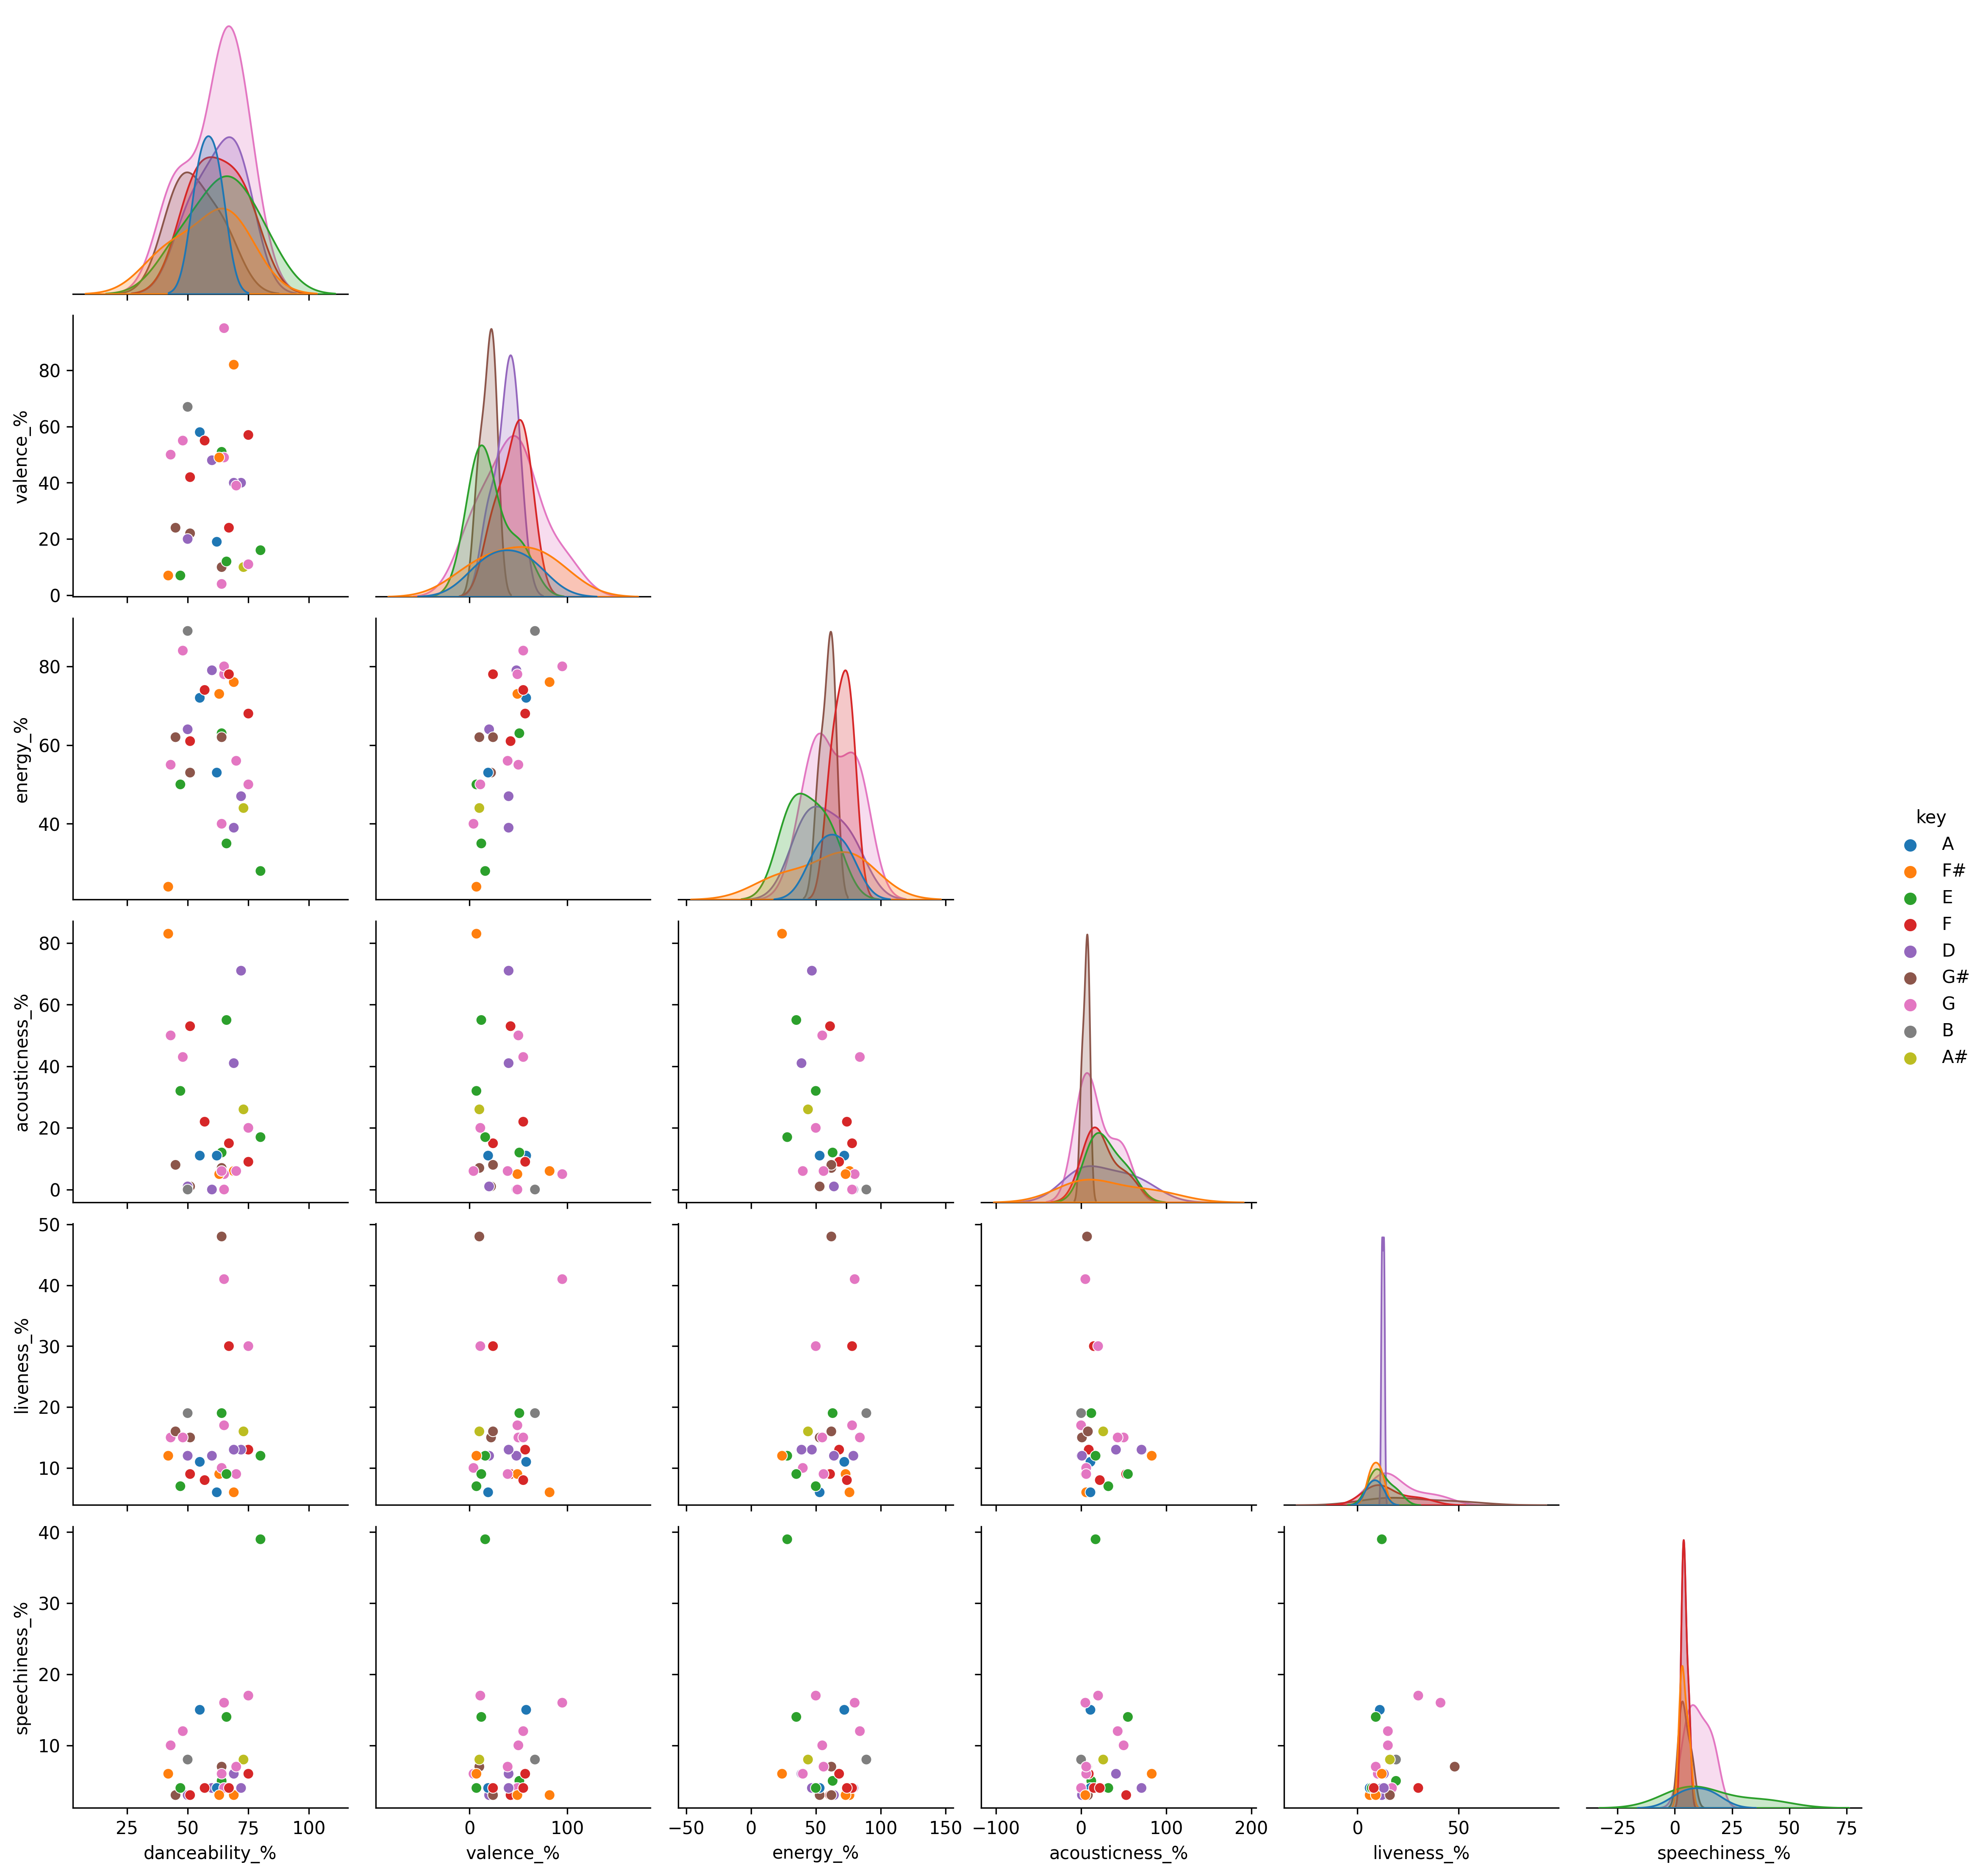

In [18]:
# Taylor Swift's Musical Attributes Distribution
selected_columns = taylorswift_data[['danceability_%',
       'valence_%', 'energy_%', 'acousticness_%',
       'liveness_%', 'speechiness_%','key']]
sns.pairplot(selected_columns, corner=True, hue='key')
plt.show()